# Holt - Winters Methods

This notebook illustrates Holt-Winters method of exponential smoothing.

## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
energy_data = pd.read_csv("./EnergyProduction.csv", index_col='DATE', parse_dates=True)

In [3]:
energy_data.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [4]:
energy_data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [5]:
energy_data.index.freq = 'MS'  # set the frequency to MS (month start)

In [6]:
energy_data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

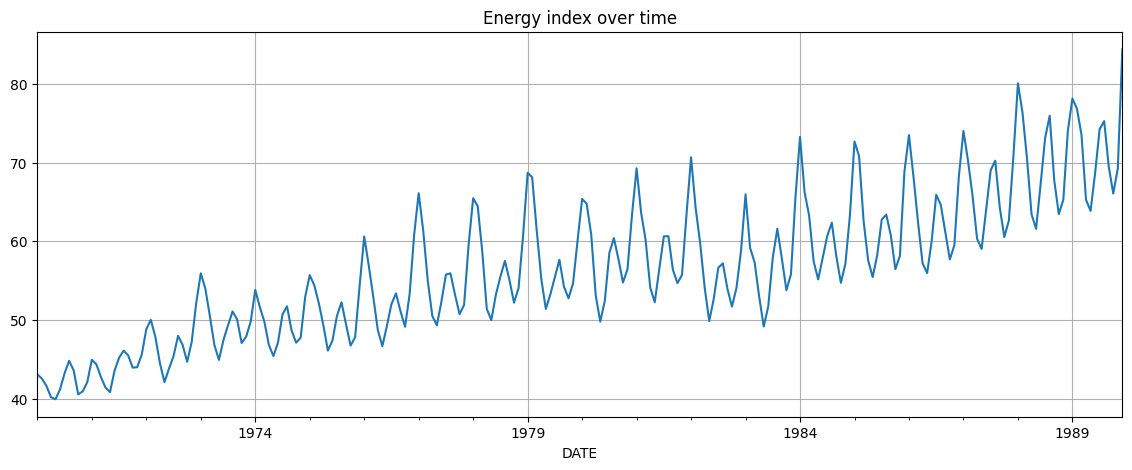

In [8]:
energy_data['EnergyIndex'].plot(figsize=(14,5), grid=True, title='Energy index over time');

## Holt-Winters simple exponential smoothing

We will compare this with normal exponential smoothing method : pandas.DataFrame.ewm()

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [10]:
alpha = 0.6

energy_data['SES'] = SimpleExpSmoothing(energy_data['EnergyIndex']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [11]:
energy_data['EWMA'] = energy_data['EnergyIndex'].ewm(alpha=alpha).mean()

<Axes: title={'center': 'Energy index over time'}, xlabel='DATE'>

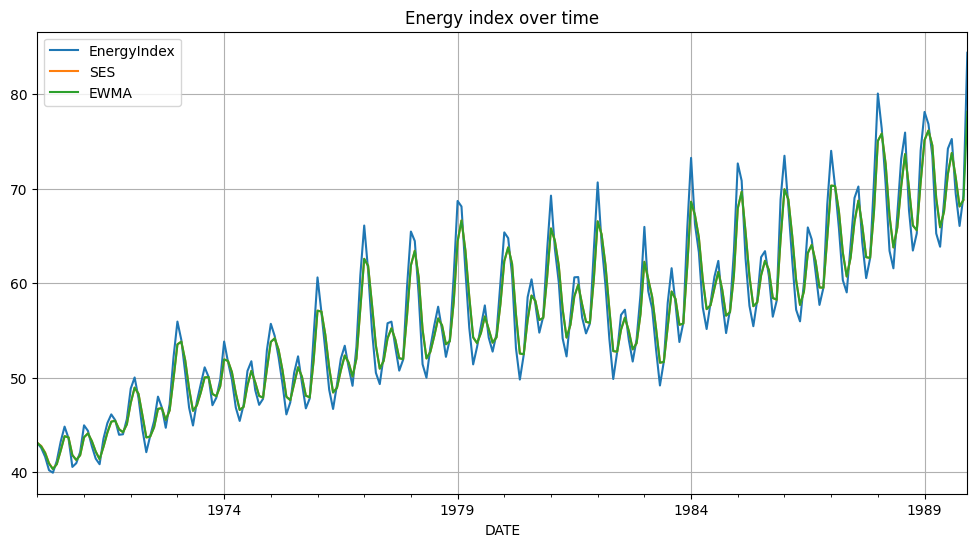

In [12]:
energy_data.plot(figsize=(12,6), grid=True, title='Energy index over time')

In [13]:
energy_data

,EnergyIndex,SES,EWMA
DATE,,,
1970-01-01,43.0869,43.086900,43.086900
1970-02-01,42.5577,42.769380,42.708900
1970-03-01,41.6215,42.080652,42.011849
1970-04-01,40.1982,40.951181,40.895070
1970-05-01,39.9321,40.339732,40.311310
...,...,...,...
1989-08-01,75.2704,73.791869,73.791869
1989-09-01,69.5107,71.223167,71.223167
1989-10-01,66.0620,68.126467,68.126467


## Holt winters double exponential smoothing

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
# additive trend

energy_data['DES_add'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add').fit().fittedvalues.shift(-1)

In [26]:
model = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add').fit(smoothing_level=0.6, smoothing_trend=0.3)

In [27]:
model.params

{'smoothing_level': 0.6,
 'smoothing_trend': 0.3,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 42.94810890288476,
 'initial_trend': -0.3395519576932593,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [16]:
# multiplicative trend

energy_data['DES_mul'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='mul').fit().fittedvalues.shift(-1)

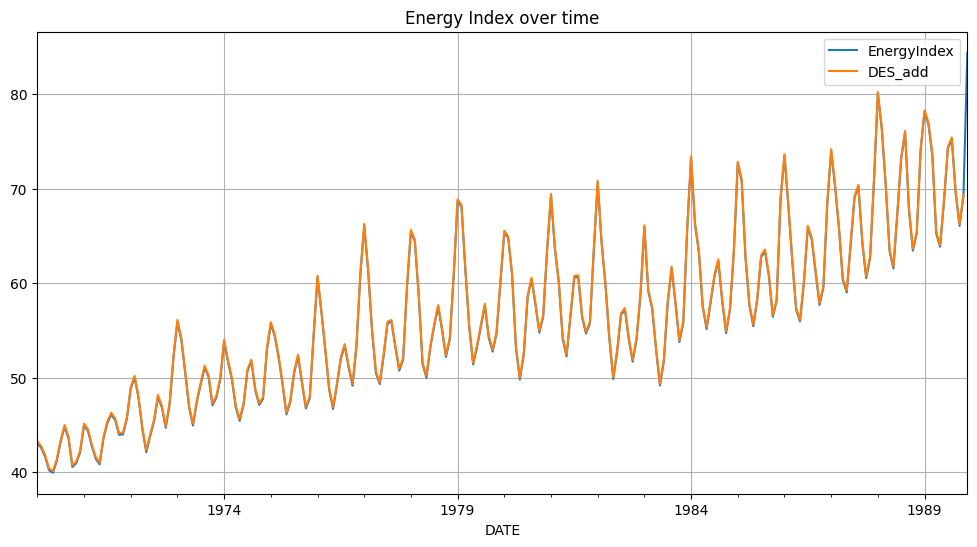

In [44]:
energy_data[['EnergyIndex', 'DES_add']].plot(figsize=(12,6), grid=True, title='Energy Index over time');

In [22]:
energy_data[['EnergyIndex', 'DES_add']]

,EnergyIndex,DES_add
DATE,,
1970-01-01,43.0869,43.259778
1970-02-01,42.5577,42.730578
1970-03-01,41.6215,41.794378
1970-04-01,40.1982,40.371078
1970-05-01,39.9321,40.104978
...,...,...
1989-08-01,75.2704,75.443278
1989-09-01,69.5107,69.683578
1989-10-01,66.0620,66.234878


## Holt-Winters triple exponential smoothing

In [39]:
# additive trend and seasonality

energy_data['TES_add'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues.shift(-1)

In [40]:
# multiplicative trend and seasonality

energy_data['TES_mul'] = ExponentialSmoothing(energy_data['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

In [41]:
model = ExponentialSmoothing(energy_data['EnergyIndex'], trend='add', seasonal='add', seasonal_periods=12).fit()

model.params

{'smoothing_level': 0.43284111144816967,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.47444797410886747,
 'damping_trend': nan,
 'initial_level': 40.45371451965402,
 'initial_trend': 0.15395818637164702,
 'initial_seasons': array([ 2.67081785,  1.1172054 , -1.09983666, -3.25280596, -3.82251554,
        -1.85893955,  0.23736414,  2.02932118,  1.42048493, -0.63154496,
         0.17088569,  1.564227  ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<Axes: title={'center': 'Energy Index over time'}, xlabel='DATE'>

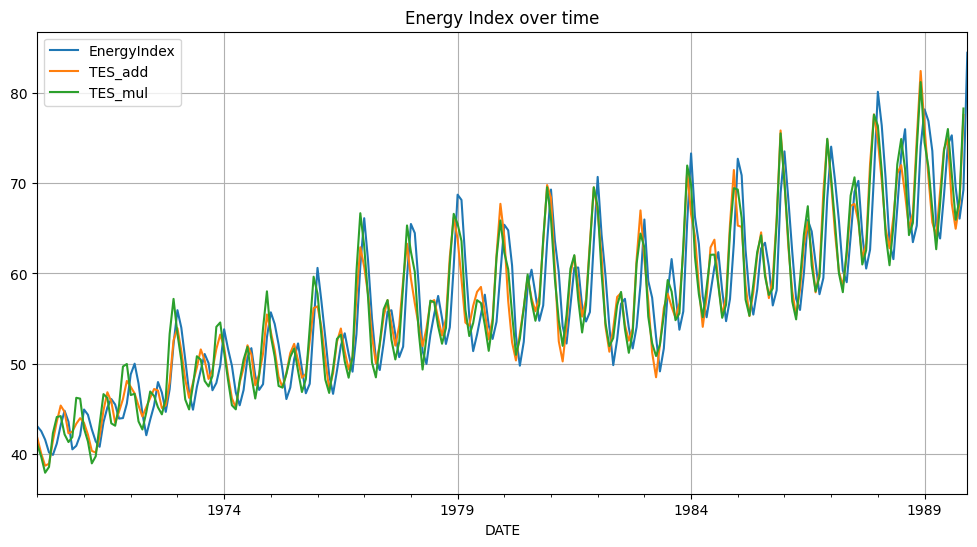

In [42]:
energy_data[['EnergyIndex', 'TES_add', 'TES_mul']].plot(figsize=(12,6), grid=True, title='Energy Index over time')